## Data Dictionary
#### Variable	Definition
* survival = Survival	(Key --> 0 = No, 1 = Yes)
* pclass = Ticket class	(Key --> 1 = 1st, 2 = 2nd, 3 = 3rd)
* sex	Sex	
* Age	Age in years	
* sibsp	# of siblings / spouses aboard the Titanic	
* parch	# of parents / children aboard the Titanic	
* ticket	Ticket number	
* fare	Passenger fare	
* cabin	Cabin number	
* embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
#### Variable Notes
* pclass: A proxy for socio-economic status (SES)
  * 1st = Upper
  * 2nd = Middle
  * 3rd = Lower

* age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

* sibsp: The dataset defines family relations in this way...
* Sibling = brother, sister, stepbrother, stepsister
* Spouse = husband, wife (mistresses and fiancés were ignored)

* parch: The dataset defines family relations in this way...
* Parent = mother, father
* Child = daughter, son, stepdaughter, stepson
  * Some children travelled only with a nanny, therefore parch=0 for them.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.pivot_table(values='Survived', index='Sex', aggfunc='count')

,Survived
Sex,
female,314
male,577


## Count of people survived who were men/women and Pclass

In [7]:
df.pivot_table(values='Survived', index='Sex',columns='Pclass',aggfunc='count')

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


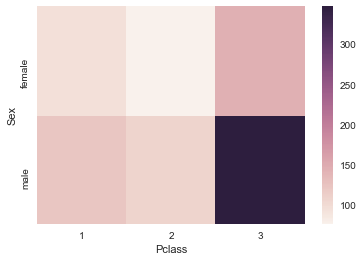

In [8]:
sns.heatmap(df.pivot_table(values='Survived', index='Sex',columns='Pclass',aggfunc='count'))

## Count of Survivors by Sex and Age

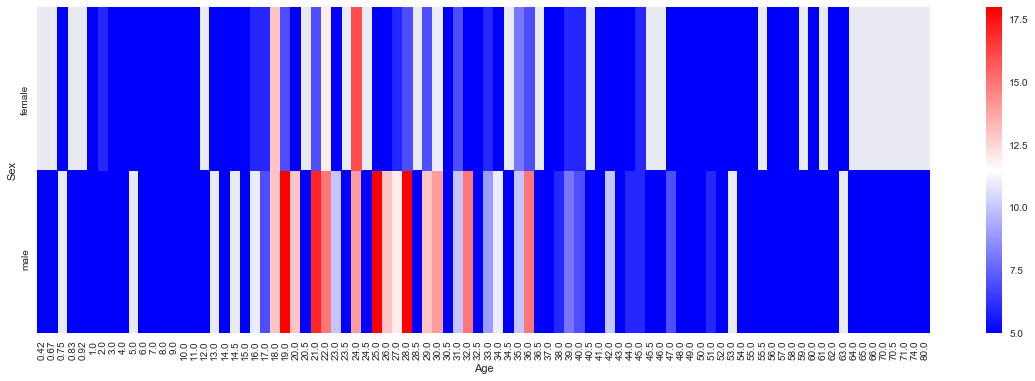

In [9]:
pt1 = df.pivot_table(values='Survived',index='Sex',columns='Age',aggfunc='count')
f, ax = plt.subplots(figsize=(20,6))
sns.heatmap(pt1, ax=ax, cmap='bwr', vmin=5)

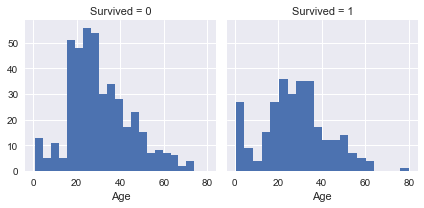

In [10]:
graph =  sns.FacetGrid(df, col='Survived')
graph.map(plt.hist, 'Age', bins=20)

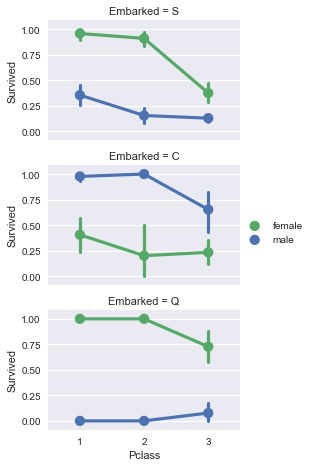

In [11]:
grid = sns.FacetGrid(df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived','Sex',palette='deep')
grid.add_legend()